<a href="https://colab.research.google.com/github/Dimple-Bansal-003/tips-prediction-project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as me
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')


In [3]:
url = 'https://raw.githubusercontent.com/Dimple-Bansal-003/tips-prediction-project/refs/heads/main/tips.csv'
df = pd.read_csv(url)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape


(244, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


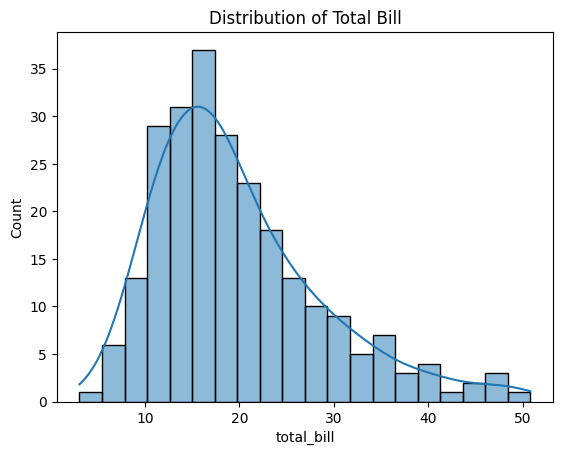

In [8]:
sns.histplot(df['total_bill'],bins=20,kde=True)
plt.title("Distribution of Total Bill")
plt.show()

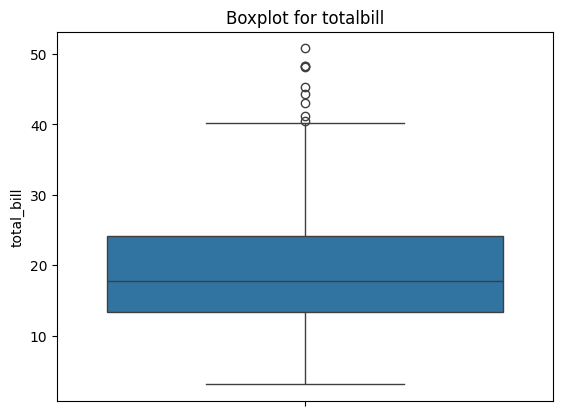

In [9]:
sns.boxplot(df['total_bill'])
plt.title("Boxplot for totalbill")
plt.show()

In [10]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

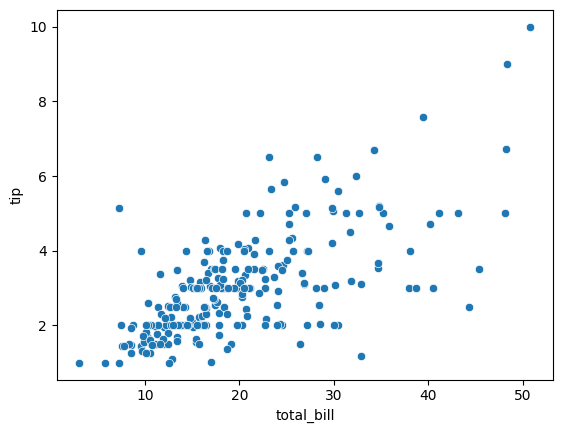

In [13]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

In [14]:
Q1_bill = df['total_bill'].quantile(0.25)
Q3_bill = df['total_bill'].quantile(0.75)
IOR_bill = Q3_bill - Q1_bill
df = df[(df['total_bill'] >=Q1_bill - 1.5*IOR_bill) & (df['total_bill'] <=Q3_bill + 1.5*IOR_bill)]

Q1_tip = df['tip'].quantile(0.25)
Q3_tip = df['tip'].quantile(0.75)
IQR_tip = Q3_tip - Q1_tip
df = df[(df['tip'] >= Q1_tip - 1.5*IQR_tip) & (df['tip']<=Q3_tip + 1.5*IQR_tip)]


In [15]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == object:
    df[col] = le.fit_transform(df[col])

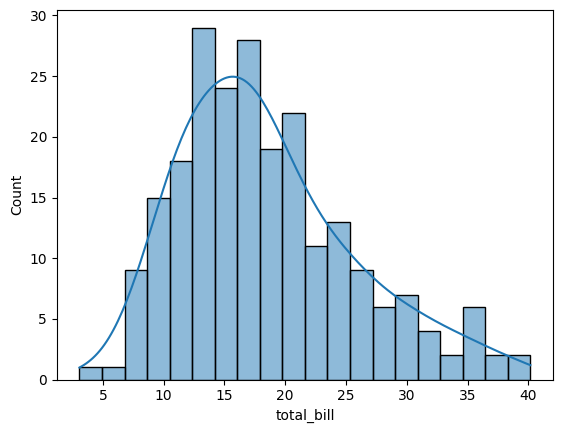

In [16]:
sns.histplot(df['total_bill'],bins=20,kde=True)
plt.show()


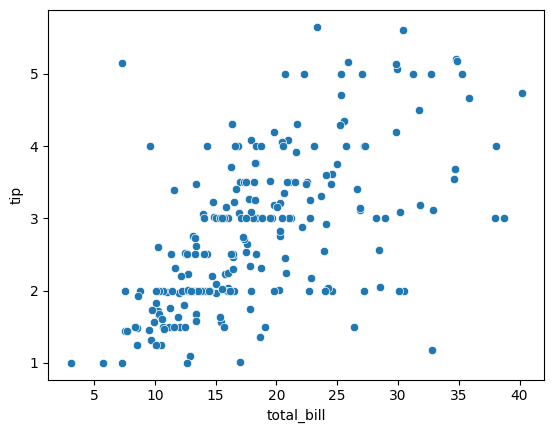

In [17]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

In [19]:
X = df.drop('tip',axis=1)
y = df['tip']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)


In [24]:
models = {'Linear regression':LinearRegression(),
          "Random Forest":RandomForestRegressor(random_state=42),
          "XGBoost":XGBRegressor(objective='reg:squarederror',ramdom_state=42),
          "AdaBoostRegressor":AdaBoostRegressor(random_state=42)
          }



In [25]:
for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred_val = model.predict(X_val_scaled)
  mea = me(y_val,y_pred_val)
  print(f"{name} Validation MAE:{mea:.3f}")


Linear regression Validation MAE:0.729
Random Forest Validation MAE:0.734
XGBoost Validation MAE:0.800
AdaBoostRegressor Validation MAE:0.808


In [28]:
best_model = models['Linear regression']
joblib.dump(best_model,'tip_model.pkl')
joblib.dump(sc,'sc.pkl')

['sc.pkl']